# ImageFolder类说明

- 在PyTorch中提供了一个类ImageFolder负责加载目录中的图像为数据集，其定义如下：
    - torchvision.datasets.ImageFolder(root, transform=None, target_transform=None, loader=\<function default_loader\>, is_valid_file=None)
        - root:指定图像的目录
        - transform:对图像的转换
        - target_transform:对标签的转换
        - loader:指定加载函数
        - is_valid_file:对文件进行格式验证

# 加载数据集

## 图像目录的组织

- 官方文档的说明是：
    - 根目录下，每一类放一个目录，目录名使用类别名。
    
```shell
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

- 这个文档采用的目录如下：

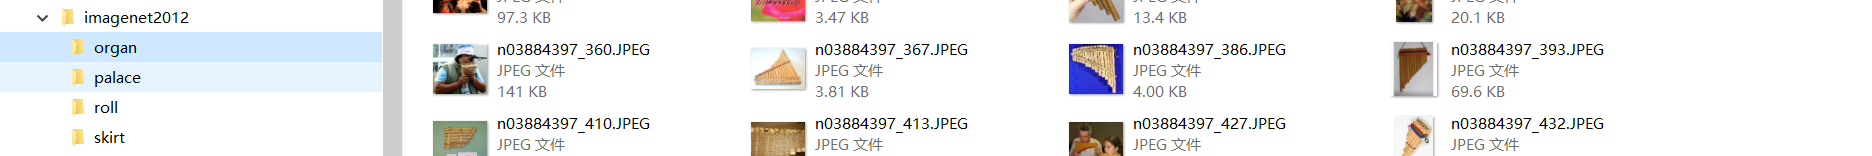

## 默认与常规加载

- 除了必须的参数，其他都使用默认值

In [1]:
from torchvision.datasets import ImageFolder

ds = ImageFolder("./imagenet2012")
print(type(ds[0][0]))


<class 'PIL.Image.Image'>


- 显示图片

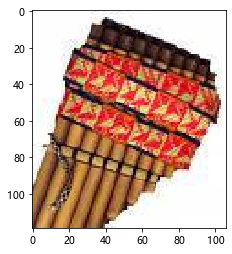

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(ds[0][0])

## ImageFolder类说明

### 继承结构：


```python
ImageFolder
 |      DatasetFolder
 |      torchvision.datasets.vision.VisionDataset
 |      torch.utils.data.dataset.Dataset
 |      builtins.object
```

### 属性
 

```python

 |      classes (list): List of the class names.
 |      class_to_idx (dict): Dict with items (class_name, class_index).
 |      imgs (list): List of (image path, class_index) tuples
```

In [3]:
print(ds.classes)
print(ds.class_to_idx)
print(ds.imgs[:5])

['organ', 'palace', 'roll', 'skirt']
{'organ': 0, 'palace': 1, 'roll': 2, 'skirt': 3}
[('./imagenet2012\\organ\\n03884397_10004.JPEG', 0), ('./imagenet2012\\organ\\n03884397_10063.JPEG', 0), ('./imagenet2012\\organ\\n03884397_10064.JPEG', 0), ('./imagenet2012\\organ\\n03884397_1009.JPEG', 0), ('./imagenet2012\\organ\\n03884397_10100.JPEG', 0)]


### 返回数据
    -  tuple: (sample, target) 

```python

 |  __getitem__(self, index)
 |      Args:
 |          index (int): Index
 |      
 |      Returns:
 |          tuple: (sample, target) where target is class_index of the target class.
```

In [4]:
print(ds[0][0])   # 第一个图像的数据
print(ds[0][1])   # 第一个图像的标签

<PIL.Image.Image image mode=RGB size=106x119 at 0x21619775518>
0


## 附录：ImageFolder的文档帮助

### 使用在线帮助

- python的在线帮助
- jupyter的帮助(下面使用jupyter提供的帮助方式)

In [5]:
ds?

Type:        ImageFolder
String form:
Dataset ImageFolder
    Number of datapoints: 4905
    Root location: ./imagenet2012
Length:      4905
File:        c:\program files\python36\lib\site-packages\torchvision\datasets\folder.py
Docstring:  
A generic data loader where the images are arranged in this way: ::

    root/dog/xxx.png
    root/dog/xxy.png
    root/dog/xxz.png

    root/cat/123.png
    root/cat/nsdf3.png
    root/cat/asd932_.png

Args:
    root (string): Root directory path.
    transform (callable, optional): A function/transform that  takes in an PIL image
        and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the
        target and transforms it.
    loader (callable, optional): A function to load an image given its path.
    is_valid_file (callable, optional): A function that takes path of an Image file
        and check if the file is a valid file (used to check of corrupt f

### 强调

- 返回的DataSet格式说明：
    1. 每一行一张图片。
    2. 每行一个元组（图像， 标签）
        - 标签自动从0开始编号
        - 通过标签与classes可以获取类别名。
        - 通过类名与class_to_idx可以获取标签；
        - 图像使用imgs可以直接获取。

# 加载数据中的图像处理

## 图像的预处理

1. 常规的图像处理包含多个处理：
    1. 统一尺寸
    2. 张量转换
    3. 其他：
        - 翻转
        - 灰度
        - ......
        - 标准化或者归一化处理

2. PyTorch的处理模式

    - transform  = Compose(\[处理1，处理2, ......\])

3. 在ImageFolder中使用tranform参数绑定图像预处理器，ImageFolder自动处理图像转换

4. 加载并与处理图像的例子

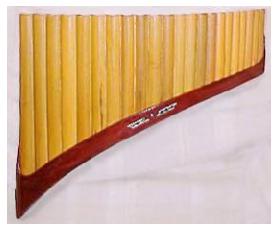

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision.transforms import *
from torchvision.transforms.functional import *

transform = Compose(
    [
        Resize(227, 227),          #RandomResizedCrop(227),
        RandomHorizontalFlip(),
        ToTensor(),
        Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),   # 均值与方差,(这个运算输入必须是Tensor图像，所以需要在ToTensor后)
    ]
)
ds = ImageFolder("./imagenet2012", transform=transform)
# print(ds[0])
# 转换为图像显示
plt.imshow(to_pil_image(ds[2][0]))
plt.axis('off')
plt.show()

## 数据集切分

- 使用pytorch提供的工具
    - `torch.utils.data.random_split`

### 切分工具说明

In [22]:
from torch.utils.data import random_split
random_split?

Signature: random_split(dataset, lengths)
Docstring:
Randomly split a dataset into non-overlapping new datasets of given lengths.

Arguments:
    dataset (Dataset): Dataset to be split
    lengths (sequence): lengths of splits to be produced
File:      c:\program files\python36\lib\site-packages\torch\utils\data\dataset.py
Type:      function


- 参数lengths指定切分的列表，不是指定比率

### 切分的例子

torch.Size([3, 227, 227])


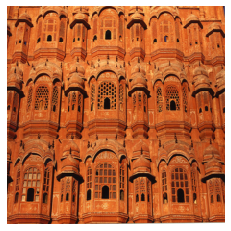

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision.transforms import *
from torchvision.transforms.functional import *
from torch.utils.data import random_split

transform = Compose(
    [
        Resize((227, 227)),          #RandomResizedCrop(227),
#         RandomHorizontalFlip(),
        ToTensor(),
        Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),   # 均值与方差,(这个运算输入必须是Tensor图像，所以需要在ToTensor后)
    ]
)
ds = ImageFolder("./imagenet2012", transform=transform)

l = len(ds)
l_train = int(l * 0.8)
train, test = random_split(ds, [l_train, l - l_train])
print(train[1][0].shape)
plt.imshow(to_pil_image(train[1][0]))
plt.axis('off')
plt.show()

## 数据集加载器

- DataLoader数据集加载器主要用来切分成训练批次
    - torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=500) 


### DataLoader的帮助

In [15]:
from torch.utils.data import DataLoader
# DataLoader?
# 参考《TORCH02_数据集.ipynb》

### DataLoader切分成训练批次的例子

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision.transforms import *
from torchvision.transforms.functional import *
from torch.utils.data import random_split
from torch.utils.data import DataLoader

transform = Compose(
    [
        Resize((227, 227)),          #RandomResizedCrop(227),
#         RandomHorizontalFlip(),
        ToTensor(),
        Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),   # 均值与方差,(这个运算输入必须是Tensor图像，所以需要在ToTensor后)
    ]
)
ds = ImageFolder("./imagenet2012", transform=transform)

l = len(ds)
l_train = int(l * 0.8)
train, test = random_split(ds, [l_train, l - l_train])
train_loader = torch.utils.data.DataLoader(dataset=train, shuffle=True, batch_size=100)   # 100，因为每个类的图像是1300个
test_loader = torch.utils.data.DataLoader(dataset=test, shuffle=True, batch_size=l - l_train)  # 一个批次直接预测
for data, target in test_loader:
    print(len(target))

981


-------

# 附录：

## AlexNet网络训练

### 数据集加载实现

- 文件名：`dataset.py`
- 前提条件：
    - 使用ImageNet2012的4个类别的训练样本

In [2]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import *
from torchvision.transforms.functional import *
from torch.utils.data import random_split
from torch.utils.data import DataLoader

# 加载指定目录下的图像，返回根据切分比例形成的数据加载器
def load_data(img_dir, rate=0.8):
    transform = Compose(
        [
            Resize((227, 227)),          #RandomResizedCrop(227),
    #         RandomHorizontalFlip(),
            ToTensor(),
            Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),   # 均值与方差,(这个运算输入必须是Tensor图像，所以需要在ToTensor后)
        ]
    )
    ds = ImageFolder(img_dir, transform=transform)

    l = len(ds)
    l_train = int(l * rate)
    train, test = random_split(ds, [l_train, l - l_train])
    
    train_loader = torch.utils.data.DataLoader(dataset=train, shuffle=True, batch_size=100)   # 100，因为每个类的图像是1300个
    test_loader = torch.utils.data.DataLoader(dataset=test, shuffle=True, batch_size=l - l_train)  # 一个批次直接预测

    return train_loader, test_loader


### AlexNet网络实现

- 文件名：`alexnet.py`

In [3]:
import torch.nn as nn
class AlexNet(nn.Module):
    def __init__(self, num_classes=4):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),    # 输入通道是1
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        # 此处有flatten格式转换
        self.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes),    # 分类只有10类
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x



### 训练实现

- 文件名：`train_alexnet.py`
- 开启了GPU判定
- 训练轮数1轮，训练完毕保存模型。

In [5]:
# from alexnet import AlexNet
# from dataset import load_data
import torch
import torch.utils.data as Data
import torchvision
import numpy as np
import struct
import cv2

# 1. 加载数据集
print("1. 加载数据集")
train_loader, test_loader = load_data("./imagenet2012", 0.8)

t_x, t_y = list(test_loader)[0]

CUDA = torch.cuda.is_available()
# 2. 网络搭建
print("2. 网络搭建")
net=AlexNet(4)
if CUDA:
    net.cuda()

# 3. 训练
print("3. 训练")
optimizer=torch.optim.Adam(net.parameters(),lr=0.001)
loss_F=torch.nn.CrossEntropyLoss()

epoch = 1


for n in range(epoch): # 数据集只迭代一次
    for step, input_data in enumerate(train_loader):
        x_, y_=input_data
        if CUDA:
            # GPU运算 -----------------------------------------------
            x_ = x_.cuda()
            y_ = y_.cuda()
        pred=net(x_.view(-1, 3, 227, 227))  
        
        loss=loss_F(pred, y_) # 计算loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            if CUDA:
                t_x = t_x.cuda()
                t_y = t_y.cuda()
            test_pred=net(t_x.view(-1, 3, 227, 227))
            prob=torch.nn.functional.softmax(test_pred, dim=1)
            pred_cls=torch.argmax(prob, dim=1)
            acc=(pred_cls == t_y).float().mean()
            print(f"轮数/批次：{n}/{step}: \t识别正确率:{acc*100:6.4f}")

# 保存模型
torch.save(net.state_dict(), "./models")  # GPU保存


1. 加载数据集
2. 网络搭建
3. 训练
轮数/批次：0/0: 	识别正确率:26.6055
轮数/批次：0/1: 	识别正确率:28.2365
轮数/批次：0/2: 	识别正确率:28.6442
轮数/批次：0/3: 	识别正确率:28.8481
轮数/批次：0/4: 	识别正确率:28.8481
轮数/批次：0/5: 	识别正确率:28.7462
轮数/批次：0/6: 	识别正确率:26.6055
轮数/批次：0/7: 	识别正确率:26.6055
轮数/批次：0/8: 	识别正确率:26.7074
轮数/批次：0/9: 	识别正确率:26.9113
轮数/批次：0/10: 	识别正确率:25.8919
轮数/批次：0/11: 	识别正确率:26.8094
轮数/批次：0/12: 	识别正确率:29.3578
轮数/批次：0/13: 	识别正确率:28.9501
轮数/批次：0/14: 	识别正确率:28.8481
轮数/批次：0/15: 	识别正确率:29.0520
轮数/批次：0/16: 	识别正确率:27.6249
轮数/批次：0/17: 	识别正确率:25.6881
轮数/批次：0/18: 	识别正确率:24.9745
轮数/批次：0/19: 	识别正确率:24.9745
轮数/批次：0/20: 	识别正确率:24.9745
轮数/批次：0/21: 	识别正确率:24.9745
轮数/批次：0/22: 	识别正确率:24.9745
轮数/批次：0/23: 	识别正确率:24.9745
轮数/批次：0/24: 	识别正确率:24.9745
轮数/批次：0/25: 	识别正确率:24.9745
轮数/批次：0/26: 	识别正确率:24.9745
轮数/批次：0/27: 	识别正确率:24.9745
轮数/批次：0/28: 	识别正确率:24.9745
轮数/批次：0/29: 	识别正确率:24.9745
轮数/批次：0/30: 	识别正确率:25.3823
轮数/批次：0/31: 	识别正确率:25.8919
轮数/批次：0/32: 	识别正确率:27.6249
轮数/批次：0/33: 	识别正确率:26.7074
轮数/批次：0/34: 	识别正确率:27.8287
轮数/批次：0/35: 	识别正确率:27.4210
轮数/批次：0/36: 	识别

### 预测实现

- 文件名：`reco_alexnet.py`
- 这个代码与上面代码不能在一个虚拟机执行，因为图片加载两次，小号内存太大，导致GPU不足。

In [4]:
# from alexnet import AlexNet
# from dataset import load_data
import torch
import torch.utils.data as Data
import torchvision
import numpy as np
import struct
import cv2

# 1. 加载数据集
print("1. 加载数据集")
train_loader, test_loader = load_data("./imagenet2012", 0.8)

t_x, t_y = list(test_loader)[0]

CUDA = torch.cuda.is_available()
# 2. 加载网络模型
print("2. 加载模型")
net=AlexNet(4)
if CUDA:
    net.cuda()
# device = torch.device('cpu')
state = torch.load("./models")  # torch.load("./models", map_location=device)
net.load_state_dict(state)


if CUDA:
    t_x = t_x.cuda()
    t_y = t_y.cuda()
test_pred=net(t_x.view(-1, 3, 227, 227))

prob=torch.nn.functional.softmax(test_pred, dim=1)
pred_cls=torch.argmax(prob, dim=1)
acc=(pred_cls == t_y).float().mean()
print(f"识别正确率:{acc*100:6.4f}")


1. 加载数据集
2. 加载模型
识别正确率:28.2365


-------